In [64]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [58]:
# Let's import the dataset

url = 'https://raw.githubusercontent.com/Jenarth/SCS3250-Group-2-Final-Project/master/Final%20Dataset.csv'
df = pd.read_csv(url, header = 0, sep =',',parse_dates=['Date'])

In [59]:
df.head()

,Date,Year,Month,year_month,Day,Weekday,Holiday,Max Temp (°C),Min Temp (°C),Mean Temp (°C),...,Snow on Grnd (cm),Barrie Ridership,Kitchener Ridership,Lakeshore East Ridership,Lakeshore West Ridership,Milton Ridership,Richmond Hill Ridership,Stouffville Ridership,Union Station Ridership,Total GO Ridership
0,2017-03-01,2017,3,2017-03,1,Wednesday,False,13.1,-1.9,5.6,...,0.0,10022,13585,25273,32909,15599,5639,8804,95802,207633
1,2017-03-02,2017,3,2017-03,2,Thursday,False,-1.3,-6.4,-3.9,...,0.5,9932,13331,26120,33884,15653,5665,8736,95873,209194
2,2017-03-03,2017,3,2017-03,3,Friday,False,-4.3,-8.1,-6.2,...,0.5,8905,12235,23801,31473,14092,5129,7918,87200,190753
3,2017-03-04,2017,3,2017-03,4,Saturday,False,-6.5,-11.9,-9.2,...,0.5,928,480,7872,11756,208,0,246,13899,35389
4,2017-03-05,2017,3,2017-03,5,Sunday,False,-0.4,-10.6,-5.5,...,0.5,803,398,4714,8381,169,0,156,8505,23126


In [60]:
# Convert weekdays into integers

weekday = {'Monday':1 , 'Tuesday':2 , 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7}
df.Weekday = [weekday[item] for item in df.Weekday]
df.head()

,Date,Year,Month,year_month,Day,Weekday,Holiday,Max Temp (°C),Min Temp (°C),Mean Temp (°C),...,Snow on Grnd (cm),Barrie Ridership,Kitchener Ridership,Lakeshore East Ridership,Lakeshore West Ridership,Milton Ridership,Richmond Hill Ridership,Stouffville Ridership,Union Station Ridership,Total GO Ridership
0,2017-03-01,2017,3,2017-03,1,3,False,13.1,-1.9,5.6,...,0.0,10022,13585,25273,32909,15599,5639,8804,95802,207633
1,2017-03-02,2017,3,2017-03,2,4,False,-1.3,-6.4,-3.9,...,0.5,9932,13331,26120,33884,15653,5665,8736,95873,209194
2,2017-03-03,2017,3,2017-03,3,5,False,-4.3,-8.1,-6.2,...,0.5,8905,12235,23801,31473,14092,5129,7918,87200,190753
3,2017-03-04,2017,3,2017-03,4,6,False,-6.5,-11.9,-9.2,...,0.5,928,480,7872,11756,208,0,246,13899,35389
4,2017-03-05,2017,3,2017-03,5,7,False,-0.4,-10.6,-5.5,...,0.5,803,398,4714,8381,169,0,156,8505,23126


In [61]:
# Let's create a new dataset to only select the month of January

jan_df = df[(df.Month == 1)& (df.Year != 2017)]
jan_df.head(2)

,Date,Year,Month,year_month,Day,Weekday,Holiday,Max Temp (°C),Min Temp (°C),Mean Temp (°C),...,Snow on Grnd (cm),Barrie Ridership,Kitchener Ridership,Lakeshore East Ridership,Lakeshore West Ridership,Milton Ridership,Richmond Hill Ridership,Stouffville Ridership,Union Station Ridership,Total GO Ridership
306,2018-01-01,2018,1,2018-01,1,1,True,-7.9,-18.6,-13.3,...,0.0,857,366,3844,6347,96,0,131,8728,20369
307,2018-01-02,2018,1,2018-01,2,2,False,-7.1,-12.5,-9.8,...,0.0,7706,10584,20084,25182,12040,4359,6969,74432,161356


In [63]:
#jan_df.plot(x='Weekday',y='Union Station Ridership', figsize=(8,6), style='o')
#plt.title('Riders by day')
#plt.xlabel('Day')
#plt.ylabel('Union Station Ridership')
#plt.show

Let's plot our data points on a graph to eyeball our dataset. We will take a look specifically at Union Station, a central station in Toronto.

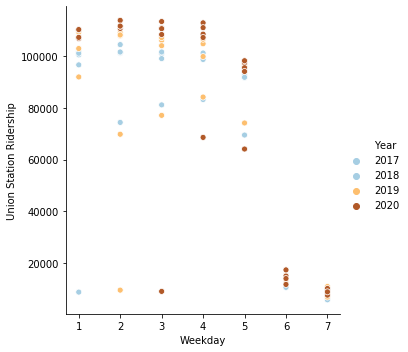

In [67]:
sns.relplot(x='Weekday',y='Union Station Ridership', data=jan_df,hue='Year',palette='Paired')

We notice one outliner by year where there is very little Riderships: the 1st of January.

Let's check our average Riderships for Union Station. 

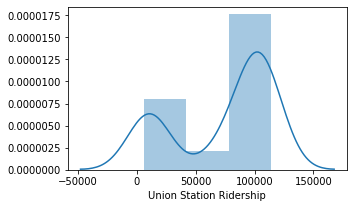

In [48]:
plt.figure(figsize=(5,3))
plt.tight_layout()
seabornInstance.distplot(jan_df['Union Station Ridership'])

In [71]:
# Now let's divide the data into attributes ('Weekday') and labels ('Union Station Riderships').

X=jan_df['Weekday'].values.reshape(-1,1)
y=jan_df['Union Station Ridership'].values.reshape(-1,1)

In [70]:
#Split the data to 20% of the data to test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [72]:
# Train the algorithm

regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

[133086.70290928]
[[-15336.91472794]]


In [53]:
y_pred = regressor.predict(X_test)

In [73]:
# Let's use our test data and see how accurately our algorithm predicts the percentage score.

df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()}).round()
df

,Actual,Predicted
0,81222,87076.0
1,104331,87076.0
2,96768,56402.0
3,101709,87076.0
4,9598,25728.0
5,92037,117750.0
6,99938,71739.0
7,109227,102413.0
8,84255,71739.0
9,112993,71739.0


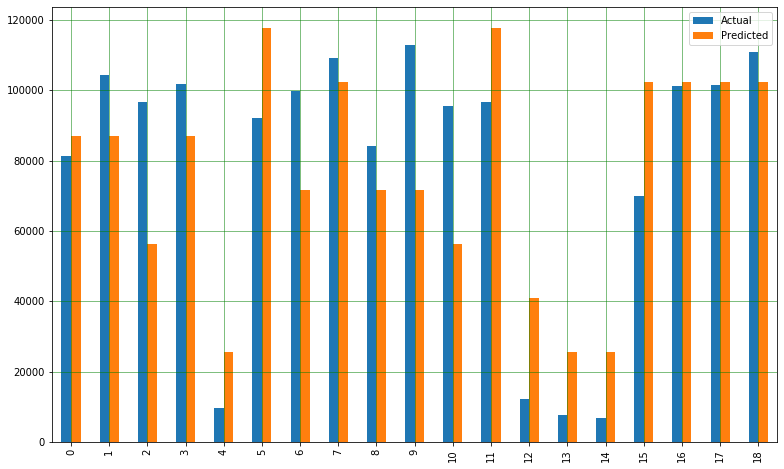

In [74]:
# Let's plot our results 


df1 = df.head(25)
df1.plot(kind='bar',figsize=(13,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### If the model lacks preicision, it has a good anticipation of busier days (Weekdays) vs. less busy day (weekends).